In [2]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

In [21]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .05
mpl.rcParams['figure.subplot.top']    = .95
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,2


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [22]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

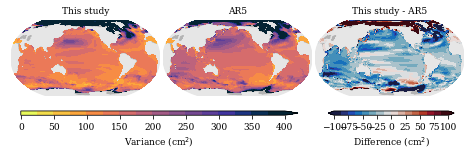

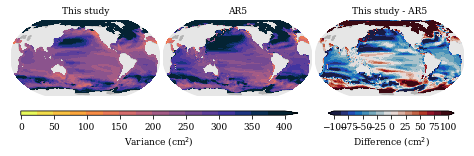

In [25]:
vmax = 400
vmax2 = 100
cmap = plt.get_cmap('cmo.thermal_r',16)
cmap2 = plt.get_cmap('cmo.balance',16)

for s,scen in enumerate(['rcp45','rcp85']):
    with xr.open_dataset(f'../data/totvar_comp_{scen}.nc') as ds:
        rsl = ds['rsl'].values
        lon = ds['lon'].values
        lat = ds['lat'].values

    with xr.open_dataset(f'../rawdata/ar5/totslr-{scen}-4.nc') as ds:
        ar5 = (100.*ds['totslr_sd'].values)**2

    fig = plt.figure()
    
    ax = fig.add_subplot(1,3,1,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,rsl,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('This study')
    makeglobal(ax)
    
    ax = fig.add_subplot(1,3,2,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,ar5,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('AR5')
    makeglobal(ax)

    cax = fig.add_axes([.07,.1,.55,.03])
    cb = plt.colorbar(im,cax=cax,orientation='horizontal',extend='max')
    cb.set_label('Variance (cm$^2$)')
    
    ax = fig.add_subplot(1,3,3,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,rsl-ar5,transform=ccrs.PlateCarree(),vmin=-vmax2,vmax=vmax2,cmap=cmap2)
    ax.set_title('This study - AR5')
    makeglobal(ax)
    
    cax = fig.add_axes([.68,.1,.25,.03])
    cb = plt.colorbar(im,cax=cax,orientation='horizontal',extend='both')
    cb.set_label('Difference (cm$^2$)')
    
    figname = f'draftplot_totvar_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()    